In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_input.shape
train_target.shape

4431872/4422102 [==============================] - 0s 0us/step


(60000,)

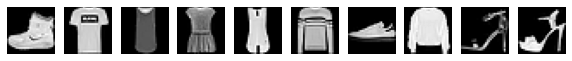

In [3]:
fig, axes = plt.subplots(1, 10, figsize = (10, 10))

for i in range(10):
    axes[i].imshow(train_input[i], cmap = 'gray')
    axes[i].axis('off')
plt.show()

In [4]:
train_target[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [5]:
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [6]:
train_scaled = (train_input/255.0).reshape(-1, 28 * 28)
test_scaled = (test_input/255.0).reshape(-1, 28 * 28)

train_scaled.shape

(60000, 784)

In [7]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2)



In [8]:
print(train_scaled.shape)

(48000, 784)


In [9]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_shape=(784, ), activation='relu'))
model.add(keras.layers.Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                23550     
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss= 'sparse_categorical_crossentropy',
              metrics='accuracy',
              optimizer = 'adam')

In [14]:
history = model.fit(train_scaled, train_target, epochs = 20, batch_size = 100, validation_data=(val_scaled, val_target))

Epoch 1/20
480/480 [==============================] - 2s 4ms/step - loss: 0.6668 - accuracy: 0.7772 - val_loss: 0.5029 - val_accuracy: 0.8267
Epoch 2/20
480/480 [==============================] - 2s 3ms/step - loss: 0.4594 - accuracy: 0.8419 - val_loss: 0.4697 - val_accuracy: 0.8383
Epoch 3/20
480/480 [==============================] - 2s 4ms/step - loss: 0.4246 - accuracy: 0.8525 - val_loss: 0.4394 - val_accuracy: 0.8497
Epoch 4/20
480/480 [==============================] - 2s 3ms/step - loss: 0.3995 - accuracy: 0.8600 - val_loss: 0.4197 - val_accuracy: 0.8557
Epoch 5/20
480/480 [==============================] - 2s 3ms/step - loss: 0.3846 - accuracy: 0.8637 - val_loss: 0.4456 - val_accuracy: 0.8443
Epoch 6/20
480/480 [==============================] - 2s 3ms/step - loss: 0.3712 - accuracy: 0.8678 - val_loss: 0.4118 - val_accuracy: 0.8581
Epoch 7/20
480/480 [==============================] - 2s 3ms/step - loss: 0.3603 - accuracy: 0.8725 - val_loss: 0.4032 - val_accuracy: 0.8618
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


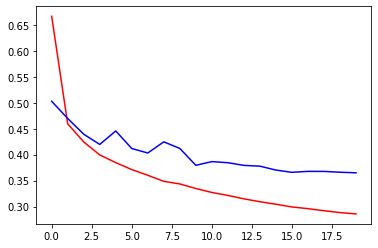

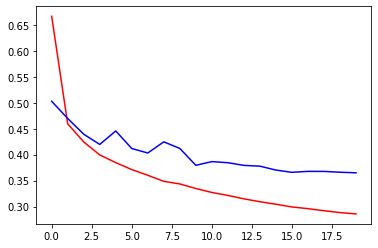

In [15]:
print(history.history.keys())

plt.plot(history.history['loss'], c = 'red')
plt.plot(history.history['val_loss'], c = 'blue')
plt.show(0)

In [16]:
# 심층 모델

model = keras.Sequential()
model.add(keras.layers.Dense(100, input_shape=(784, ), 
                             activation='relu', name = 'hidden1'))
model.add(keras.layers.Dense(30, activation= 'relu', name = 'hidden2'))
model.add(keras.layers.Dense(10, activation= 'softmax', name = 'output'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 30)                3030      
                                                                 
 output (Dense)              (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss= 'sparse_categorical_crossentropy',
              metrics='accuracy',
              optimizer = 'adam')

In [18]:
history = model.fit(train_scaled, train_target, epochs = 20, batch_size = 100, validation_data=(val_scaled, val_target))

Epoch 1/20
480/480 [==============================] - 3s 5ms/step - loss: 0.5944 - accuracy: 0.7926 - val_loss: 0.4518 - val_accuracy: 0.8443
Epoch 2/20
480/480 [==============================] - 3s 5ms/step - loss: 0.4126 - accuracy: 0.8554 - val_loss: 0.4046 - val_accuracy: 0.8607
Epoch 3/20
480/480 [==============================] - 2s 5ms/step - loss: 0.3715 - accuracy: 0.8675 - val_loss: 0.3982 - val_accuracy: 0.8570
Epoch 4/20
480/480 [==============================] - 2s 5ms/step - loss: 0.3458 - accuracy: 0.8751 - val_loss: 0.3872 - val_accuracy: 0.8627
Epoch 5/20
480/480 [==============================] - 2s 5ms/step - loss: 0.3239 - accuracy: 0.8826 - val_loss: 0.3755 - val_accuracy: 0.8678
Epoch 6/20
480/480 [==============================] - 2s 5ms/step - loss: 0.3109 - accuracy: 0.8871 - val_loss: 0.3763 - val_accuracy: 0.8659
Epoch 7/20
480/480 [==============================] - 2s 5ms/step - loss: 0.2985 - accuracy: 0.8918 - val_loss: 0.3592 - val_accuracy: 0.8715
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


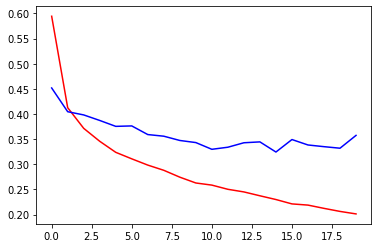

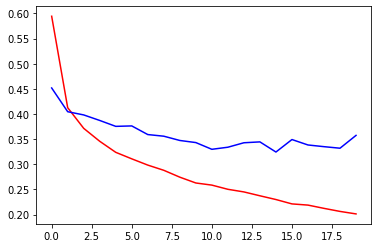

In [19]:
print(history.history.keys())

plt.plot(history.history['loss'], c = 'red')
plt.plot(history.history['val_loss'], c = 'blue')
plt.show(0)

In [20]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.3672 - accuracy: 0.8774


[0.36721503734588623, 0.8773999810218811]

In [8]:
## model 함수 정의

def model_fn(a_layer=None, name = None):
    model= keras.Sequential(name = name)
    model.add(keras.layers.Flatten(input_shape = (784, )))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation= 'softmax'))

    return model

In [22]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, validation_data=(val_scaled, val_target))

model.summary()

Epoch 1/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5252 - accuracy: 0.8138
Epoch 2/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3915 - accuracy: 0.8609
Epoch 3/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3485 - accuracy: 0.8730
Epoch 4/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3240 - accuracy: 0.8804
Epoch 5/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3046 - accuracy: 0.8871
Epoch 6/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2867 - accuracy: 0.8941
Epoch 7/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2778 - accuracy: 0.8975
Epoch 8/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2642 - accuracy: 0.9017
Epoch 9/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2565 - accuracy: 0.9045
Epoch 10/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.247

In [23]:
model.evaluate(test_scaled, test_target)

ValueError: ignored

dict_keys(['loss', 'accuracy'])


KeyError: ignored

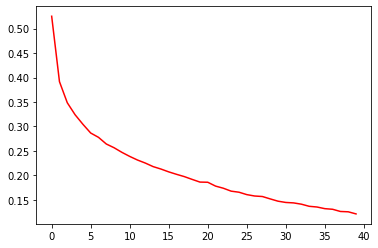

In [24]:
print(history.history.keys())

plt.plot(history.history['loss'], c = 'red')
plt.plot(history.history['val_loss'], c = 'blue')
plt.show(0)

In [29]:
# 옵티마이져 비교 rmsprop

model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, validation_data=(val_scaled, val_target))

model.summary()

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5238 - accuracy: 0.8128 - val_loss: 0.4074 - val_accuracy: 0.8567
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3886 - accuracy: 0.8611 - val_loss: 0.3940 - val_accuracy: 0.8619
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3521 - accuracy: 0.8744 - val_loss: 0.4195 - val_accuracy: 0.8509
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3328 - accuracy: 0.8800 - val_loss: 0.3821 - val_accuracy: 0.8687
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3184 - accuracy: 0.8858 - val_loss: 0.4194 - val_accuracy: 0.8645
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3071 - accuracy: 0.8910 - val_loss: 0.3727 - val_accuracy: 0.8742
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2975 - accuracy: 0.8961 - val_loss: 0.3726 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


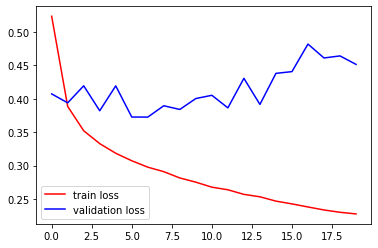

In [30]:
print(history.history.keys())

plt.plot(history.history['loss'], c = 'r', label = 'train loss')
plt.plot(history.history['val_loss'], c = 'b', label = 'validation loss')
plt.legend()
plt.show()

In [31]:
# 옵티마이져 비교 rmsprop
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, validation_data=(val_scaled, val_target))

model.summary()

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5337 - accuracy: 0.8140 - val_loss: 0.4332 - val_accuracy: 0.8463
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3912 - accuracy: 0.8601 - val_loss: 0.4064 - val_accuracy: 0.8547
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3503 - accuracy: 0.8738 - val_loss: 0.3912 - val_accuracy: 0.8608
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3248 - accuracy: 0.8830 - val_loss: 0.3563 - val_accuracy: 0.8749
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3052 - accuracy: 0.8880 - val_loss: 0.3465 - val_accuracy: 0.8754
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2910 - accuracy: 0.8934 - val_loss: 0.3394 - val_accuracy: 0.8811
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2796 - accuracy: 0.8972 - val_loss: 0.3414 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


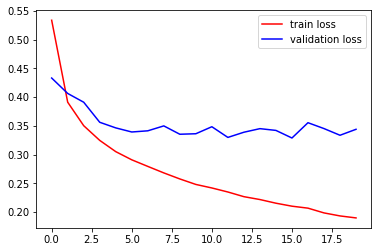

In [32]:
print(history.history.keys())

plt.plot(history.history['loss'], c = 'r', label = 'train loss')
plt.plot(history.history['val_loss'], c = 'b', label = 'validation loss')
plt.legend()
plt.show()

In [16]:
# drop out을 시도한다.
# 0.3은 30%를 Dropout한다.
model = model_fn(keras.layers.Dropout(0.3), name = 'Dropoutlayer')
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics='accuracy')


In [17]:
history = model.fit(train_scaled, train_target, epochs = 20, validation_data=(val_scaled, val_target))

model.summary()

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5862 - accuracy: 0.7931 - val_loss: 0.4430 - val_accuracy: 0.8406
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4388 - accuracy: 0.8419 - val_loss: 0.4114 - val_accuracy: 0.8497
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4005 - accuracy: 0.8532 - val_loss: 0.3905 - val_accuracy: 0.8602
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3840 - accuracy: 0.8602 - val_loss: 0.3594 - val_accuracy: 0.8688
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3682 - accuracy: 0.8653 - val_loss: 0.3539 - val_accuracy: 0.8699
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3532 - accuracy: 0.8719 - val_loss: 0.3406 - val_accuracy: 0.8742
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3416 - accuracy: 0.8754 - val_loss: 0.3422 - val_accuracy:

In [18]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 4ms/step - loss: 0.3581 - accuracy: 0.8738


[0.358123242855072, 0.8737999796867371]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


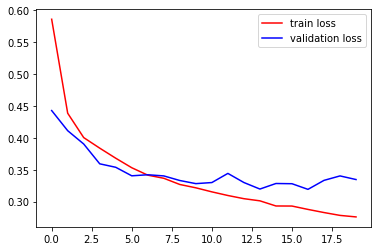

In [19]:
print(history.history.keys())

plt.plot(history.history['loss'], c = 'r', label = 'train loss')
plt.plot(history.history['val_loss'], c = 'b', label = 'validation loss')
plt.legend()
plt.show()

In [ ]:
# 결론 : Drop out으로 조금 더 나아졌다.